<a href="https://colab.research.google.com/github/ea-analisisdatos/googlecolab/blob/main/1_Tratamiento_nulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamiento de Valores Nulos

### Importar Librerías

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importar los datos

In [ ]:
ruta = '../data/calidad_aire_2022.csv'
ruta_nuevoCSV = '../data/calidad_aire_2022_clean_nulos.csv'
data = pd.read_csv(ruta, delimiter=',', engine='python', index_col=0)
data.head()

,CODIGO,FECHA,ANO,MES,DIA,DIA_SEMANA,HORA,ESTACION,SO2,PM10,...,ICA_PM10,ICA_O3,ICA_NO2,ICA,VEL_VIENTO,DIR_VIENTO,TEMPERATURA,HUMEDAD,PRECIPITACION,DIR_VIENTO_CARDINAL
0,28079008,2022-01-01 00:00:00,2022.0,1.0,1.0,Sabado,0,8.0,4.0,16.0,...,32.0,15.32,87.5,34.51,NaN,NaN,NaN,NaN,NaN,NaN
1,28079008,2022-01-01 01:00:00,2022.0,1.0,1.0,Sabado,1,8.0,4.0,27.0,...,54.0,6.82,120.0,46.00,NaN,NaN,NaN,NaN,NaN,NaN
2,28079008,2022-01-01 02:00:00,2022.0,1.0,1.0,Sabado,2,8.0,3.0,27.0,...,54.0,5.88,117.5,44.94,NaN,NaN,NaN,NaN,NaN,NaN
3,28079008,2022-01-01 03:00:00,2022.0,1.0,1.0,Sabado,3,8.0,3.0,17.0,...,34.0,11.85,95.0,35.81,NaN,NaN,NaN,NaN,NaN,NaN
4,28079008,2022-01-01 04:00:00,2022.0,1.0,1.0,Sabado,4,8.0,3.0,5.0,...,10.0,20.55,65.0,24.49,NaN,NaN,NaN,NaN,NaN,NaN


#### Cantidad de Registros Importados

In [ ]:
data.shape

(87072, 27)

#### Identificación de los tipos de columnas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87072 entries, 0 to 87071
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODIGO               87072 non-null  int64  
 1   FECHA                87072 non-null  object 
 2   ANO                  87072 non-null  float64
 3   MES                  87072 non-null  float64
 4   DIA                  87072 non-null  float64
 5   DIA_SEMANA           87072 non-null  object 
 6   HORA                 87072 non-null  int64  
 7   ESTACION             87072 non-null  float64
 8   SO2                  25293 non-null  float64
 9   PM10                 32016 non-null  float64
 10  O3                   34320 non-null  float64
 11  NO2                  43097 non-null  float64
 12  PM2.5                16127 non-null  float64
 13  NOM_TIPO             43536 non-null  object 
 14  LATITUD              43536 non-null  float64
 15  LONGITUD             43536 non-null 

### Estadística Descriptiva

In [ ]:
##estadísticas descriptivas
data.describe().round(1)

,CODIGO,ANO,MES,DIA,HORA,ESTACION,SO2,PM10,O3,NO2,...,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA,VEL_VIENTO,DIR_VIENTO,TEMPERATURA,HUMEDAD,PRECIPITACION
count,87072.0,87072.0,87072.0,87072.0,87072.0,87072.0,25293.0,32016.0,34320.0,43097.0,...,25293.0,32016.0,34320.0,43097.0,43318.0,43536.0,43536.0,43536.0,43536.0,43536.0
mean,28079024.1,2022.0,6.5,15.7,11.5,24.1,3.9,20.6,53.2,27.9,...,3.1,41.2,44.3,69.8,44.3,0.6,104.6,17.1,57.0,0.0
std,10.5,0.0,3.5,8.8,6.9,10.5,2.6,25.2,31.4,20.8,...,2.1,50.3,26.2,52.1,21.5,0.7,99.8,9.2,20.8,0.2
min,28079008.0,2022.0,1.0,1.0,0.0,8.0,0.0,1.0,0.7,1.0,...,0.0,2.0,0.6,2.5,0.9,0.0,0.0,-8.4,6.0,0.0
25%,28079018.0,2022.0,4.0,8.0,5.8,18.0,2.0,9.0,29.4,12.0,...,1.6,18.0,24.5,30.0,31.6,0.0,0.0,9.9,41.0,0.0
50%,28079024.0,2022.0,7.0,16.0,11.5,24.0,4.0,16.0,53.8,22.0,...,3.2,32.0,44.8,55.0,40.4,0.7,123.0,15.9,63.0,0.0
75%,28079035.0,2022.0,10.0,23.0,17.2,35.0,5.0,25.0,74.1,38.0,...,4.0,50.0,61.7,95.0,52.8,0.7,195.0,24.2,68.0,0.0
max,28079036.0,2022.0,12.0,31.0,23.0,36.0,41.0,678.0,198.7,172.0,...,32.8,1356.0,165.6,430.0,468.6,7.3,359.0,42.2,100.0,12.1


### Tratamiento Nulos

####  1. Identifica valores nulos

In [ ]:
data.isnull().sum()

CODIGO                     0
FECHA                      0
ANO                        0
MES                        0
DIA                        0
DIA_SEMANA                 0
HORA                       0
ESTACION                   0
SO2                    61779
PM10                   55056
O3                     52752
NO2                    43975
PM2.5                  70945
NOM_TIPO               43536
LATITUD                43536
LONGITUD               43536
ICA_SO2                61779
ICA_PM10               55056
ICA_O3                 52752
ICA_NO2                43975
ICA                    43754
VEL_VIENTO             43536
DIR_VIENTO             43536
TEMPERATURA            43536
HUMEDAD                43536
PRECIPITACION          43536
DIR_VIENTO_CARDINAL    43536
dtype: int64

#####  1.1. Identifica si hay valores nulos en TODAS las columnas del dataframe "data"

In [ ]:
datos_seleccionados = data
for columna in datos_seleccionados:
    if datos_seleccionados[columna].isnull().any():
        print(f"La columna {columna} tiene valores nulos.")

La columna SO2 tiene valores nulos.
La columna PM10 tiene valores nulos.
La columna O3 tiene valores nulos.
La columna NO2 tiene valores nulos.
La columna PM2.5 tiene valores nulos.
La columna NOM_TIPO tiene valores nulos.
La columna LATITUD tiene valores nulos.
La columna LONGITUD tiene valores nulos.
La columna ICA_SO2 tiene valores nulos.
La columna ICA_PM10 tiene valores nulos.
La columna ICA_O3 tiene valores nulos.
La columna ICA_NO2 tiene valores nulos.
La columna ICA tiene valores nulos.
La columna VEL_VIENTO tiene valores nulos.
La columna DIR_VIENTO tiene valores nulos.
La columna TEMPERATURA tiene valores nulos.
La columna HUMEDAD tiene valores nulos.
La columna PRECIPITACION tiene valores nulos.
La columna DIR_VIENTO_CARDINAL tiene valores nulos.


#####  1.2. Visualización de los valores nulos en la gráfica

<Axes: >

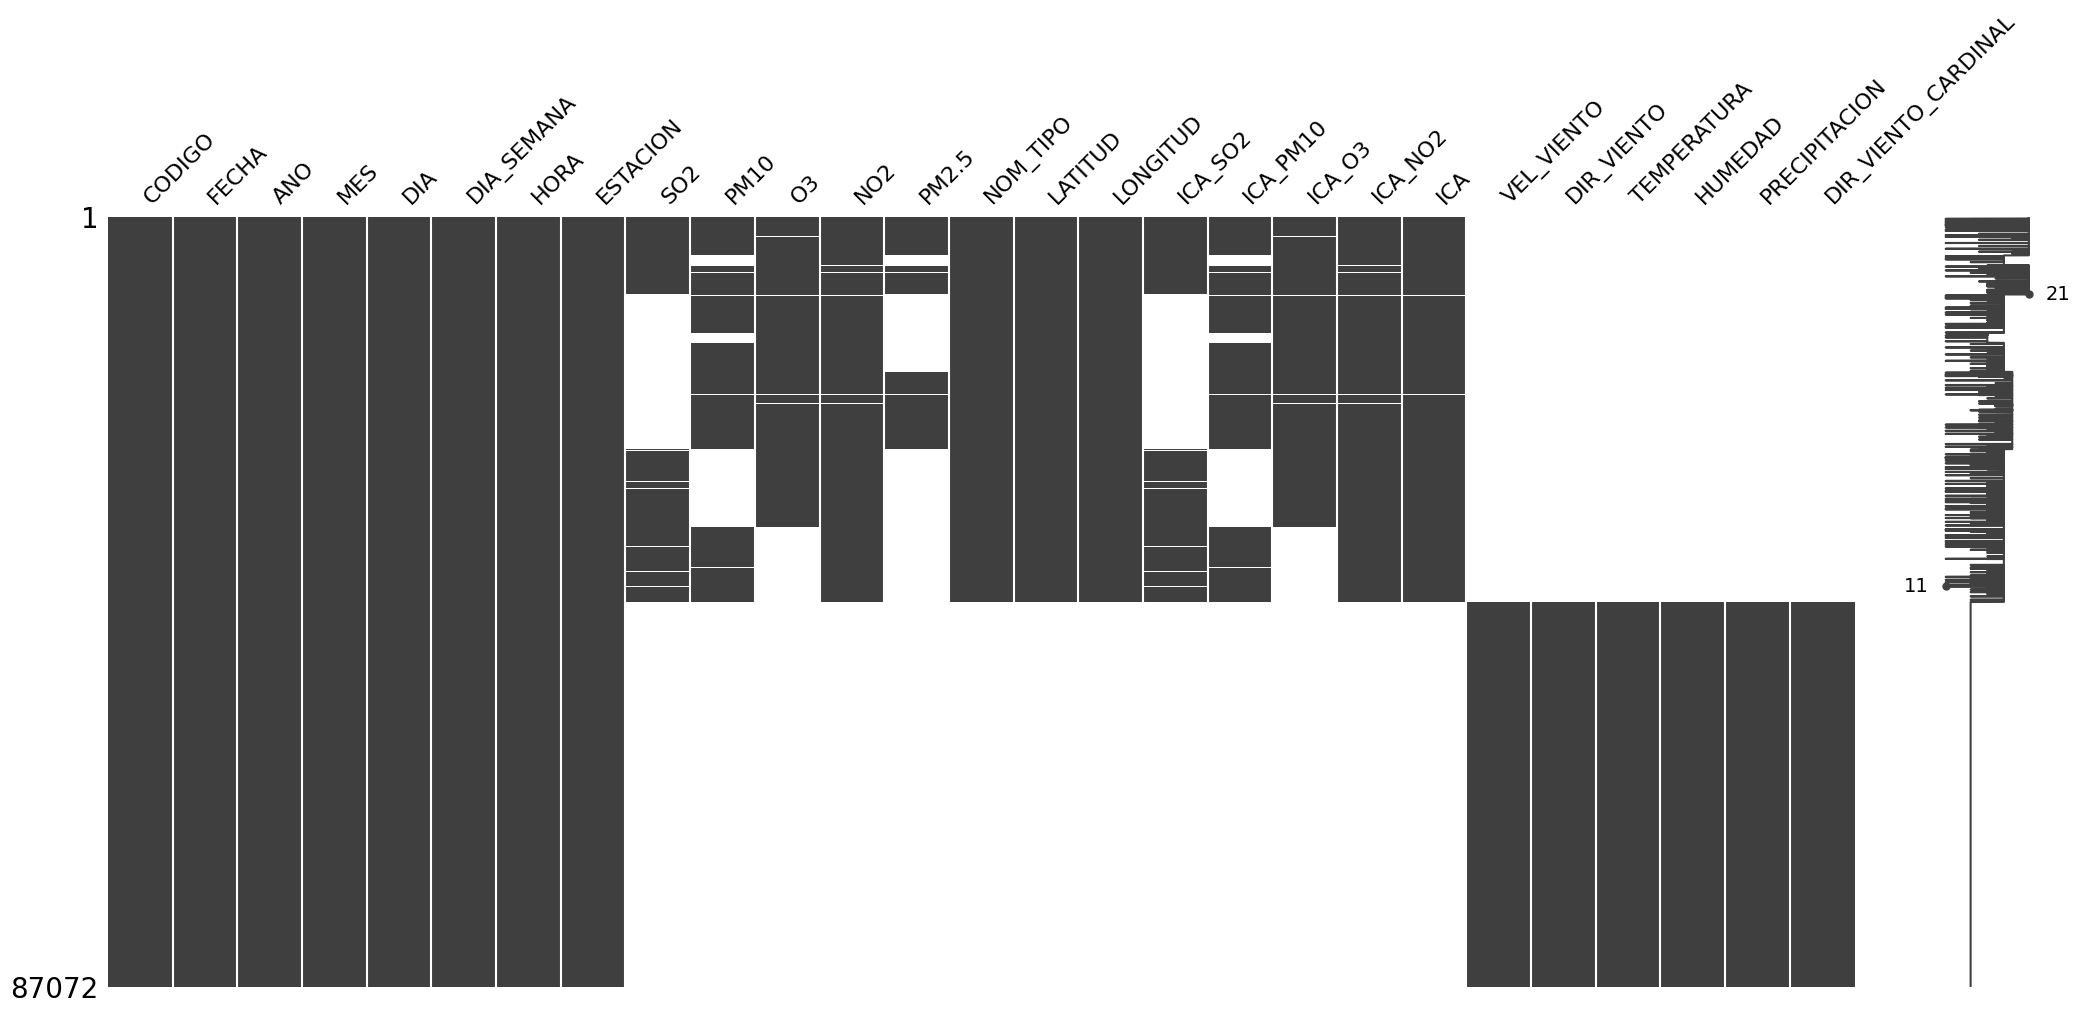

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

#####  1.3. Rellena las columnas que contienen valor nulo con la mediana y crea un nuevo DataFrame.

In [ ]:
# función que recibe una lista de columnas, calcula la mediana
def nulos(dataframe, columns):
    resultado = pd.DataFrame(columns=['Columna', 'Valor_mediana'])

    for col in columns:
        median_value = dataframe[col].median()
        dataframe[col] = dataframe[col].fillna(median_value)

        resultado = pd.concat([resultado, pd.DataFrame({
            'Columna': [col],
            'Valor_mediana': [median_value]
        })], ignore_index=True)
    df_cuartil = resultado
    return resultado

#####  1.4. Selecciona solamente aquellas columnas que se quiere calcular la mediana

In [ ]:
data_nulos = data
numeric_columns = ['SO2', 'PM10', 'O3', 'NO2', 'PM2.5', 'VEL_VIENTO', 'DIR_VIENTO', 'TEMPERATURA', 'HUMEDAD', 'PRECIPITACION']  # Lista de columnas

resultado = nulos(data_nulos, numeric_columns)
print(resultado)

         Columna  Valor_mediana
0            SO2           4.00
1           PM10          16.00
2             O3          53.75
3            NO2          22.00
4          PM2.5           8.00
5     VEL_VIENTO           0.67
6     DIR_VIENTO         123.00
7    TEMPERATURA          15.90
8        HUMEDAD          63.00
9  PRECIPITACION           0.00


In [ ]:
data_nulos.head()

,CODIGO,FECHA,ANO,MES,DIA,DIA_SEMANA,HORA,ESTACION,SO2,PM10,...,ICA_PM10,ICA_O3,ICA_NO2,ICA,VEL_VIENTO,DIR_VIENTO,TEMPERATURA,HUMEDAD,PRECIPITACION,DIR_VIENTO_CARDINAL
0,28079008,2022-01-01 00:00:00,2022.0,1.0,1.0,Sabado,0,8.0,4.0,16.0,...,32.0,15.32,87.5,34.51,0.67,123.0,15.9,63.0,0.0,NaN
1,28079008,2022-01-01 01:00:00,2022.0,1.0,1.0,Sabado,1,8.0,4.0,27.0,...,54.0,6.82,120.0,46.00,0.67,123.0,15.9,63.0,0.0,NaN
2,28079008,2022-01-01 02:00:00,2022.0,1.0,1.0,Sabado,2,8.0,3.0,27.0,...,54.0,5.88,117.5,44.94,0.67,123.0,15.9,63.0,0.0,NaN
3,28079008,2022-01-01 03:00:00,2022.0,1.0,1.0,Sabado,3,8.0,3.0,17.0,...,34.0,11.85,95.0,35.81,0.67,123.0,15.9,63.0,0.0,NaN
4,28079008,2022-01-01 04:00:00,2022.0,1.0,1.0,Sabado,4,8.0,3.0,5.0,...,10.0,20.55,65.0,24.49,0.67,123.0,15.9,63.0,0.0,NaN


Verifica si todavia hay valores nulos para las columnas selecionadas

In [ ]:
data_nulos.isnull().sum()

CODIGO                     0
FECHA                      0
ANO                        0
MES                        0
DIA                        0
DIA_SEMANA                 0
HORA                       0
ESTACION                   0
SO2                        0
PM10                       0
O3                         0
NO2                        0
PM2.5                      0
NOM_TIPO               43536
LATITUD                43536
LONGITUD               43536
ICA_SO2                61779
ICA_PM10               55056
ICA_O3                 52752
ICA_NO2                43975
ICA                    43754
VEL_VIENTO                 0
DIR_VIENTO                 0
TEMPERATURA                0
HUMEDAD                    0
PRECIPITACION              0
DIR_VIENTO_CARDINAL    43536
dtype: int64

#####  1.4. Genera el CSV después del pocesamiento de los valores nulos

In [ ]:
data_nulos.to_csv(ruta_nuevoCSV, index=False)